In [34]:
#make 4 grid depicting column density with curve fit function
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
plt.style.use('dark_background')
import scipy
from scipy import optimize

In [20]:
#only cell in need of changing between runs
inputfile = ('/scratch/jak491/npz_storage/covering_grid_den0.npz','/scratch/jak491/npz_storage/covering_grid_den1.npz','/scratch/jak491/npz_storage/covering_grid_den2.npz', '/scratch/jak491/npz_storage/covering_grid_den3.npz', '/scratch/jak491/npz_storage/covering_grid_den4.npz', '/scratch/jak491/npz_storage/covering_grid_den5.npz')
percent = 0
perc = '0'
titles = ('gravity only', 'gravity + turbulence','gravity + turbulence\n + magnetic fields', 'gravity + turbulence\n + magnetic fields + protostellar outflows')
lower_limit = .5
upper_limit = 2

In [14]:
#select subrange of values to put in function
def linear(x, m, b): 
    y = m*x + b
    return y
#y2 = linear(range(6),np.ones(6)*2,np.ones(6))

starting
0


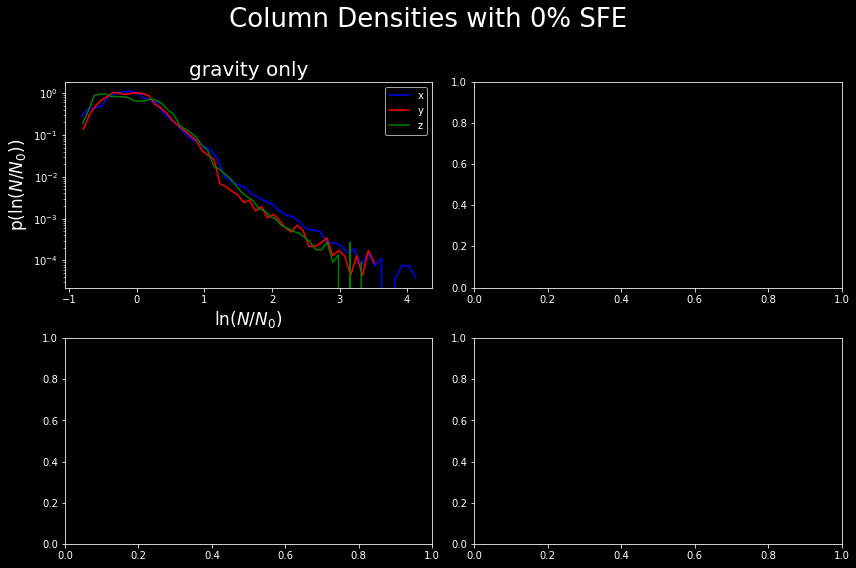

time: 0.09217292467753092


In [15]:
start = time.time()
print('starting')

d = {}
variable_name =('density_g','density_gt','density_gtm', 'density_gtmp')
inputfile = inputfile[percent]
plot_data = np.load(inputfile, allow_pickle=True)

fig, ax = plt.subplots(nrows=2,ncols=2, sharex=False,figsize=(12,8))
ax =ax.ravel()
plt.suptitle('Column Densities with ' + perc + '% SFE', size =26)
plot_data = np.load(inputfile, allow_pickle=True)

for n in range(1):
    den = plot_data[plot_data.files[n]]
    color_list = ('b', 'r', 'g')
    print(n)     #for time keeping
    
    for a in (range(3)):
        den_d = np.sum(den, axis = a)
        den_flat_d = den_d.flatten()
        den_mean_d = np.mean(den_flat_d)
        log_den_d = np.log(den_flat_d/den_mean_d)  #log step is slowing down
        counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)

        bin_list = []
        for i in range(len(binS_d)-1):
            bin_i=(binS_d[i]+binS_d[i+1])/2
            bin_list.append(bin_i)
        ax[n].set_xlabel(r'ln($N/N_0$)', size=17)
        ax[n].set_ylabel(r'p(ln($N/N_0$))', size=17)
        ax[n].set_title(titles[n], size = 20)
        ax[n].plot(bin_list, counts_d, color = color_list[a])
        ax[n].set_yscale('log')


    ax[n].legend([ 'x', 'y', 'z'])
plt.tight_layout()
plt.subplots_adjust(top=.85)
plt.savefig('test') #('column_den_4lv_'+perc+'per', bbox_inches='tight')

plt.show()

end = time.time()
print("time:",(end-start)/60)

In [29]:
#create subrange between bin values of limits set near top
x =[]
y = []
for i in range(len(bin_list)):
    if bin_list[i] > lower_limit:
        if bin_list[i] < upper_limit:
            x.append(bin_list[i])
            y.append(counts_d[i])


In [35]:
scipy.optimize.curve_fit(linear, x, y)

(array([-0.14879618,  0.24259241]),
 array([[ 0.00074223, -0.00093515],
        [-0.00093515,  0.0013194 ]]))